In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


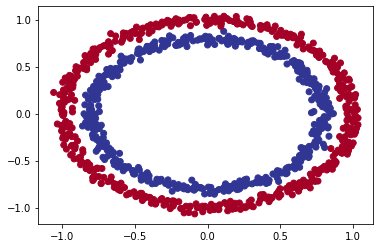

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
#Check the shapes of our features
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 386us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 386us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 354us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 322us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 354us/step - loss: 0.6942 - accuracy: 0.4820


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 322us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy.
So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 289us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 314us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, feature (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the descision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the dicision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing binary classification


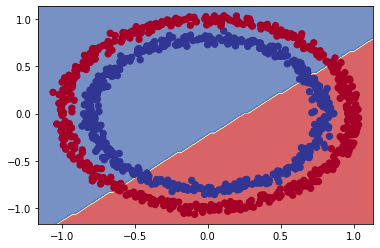

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [17]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# Disabled to be able to run all cells
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# 3. Fit the model
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 1ms/step - loss: 57.8926 - mae: 57.8926


[57.892578125, 57.892578125]

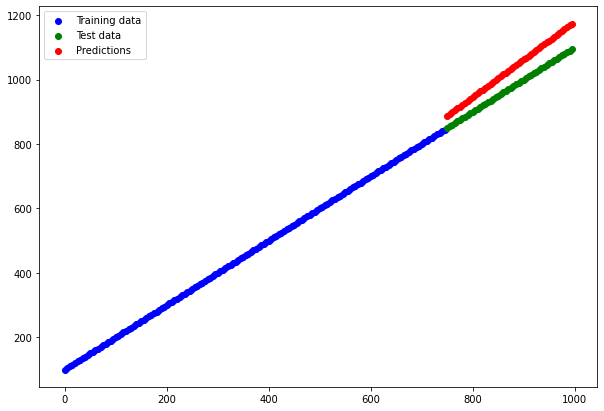

In [19]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
 1/32 [..............................] - ETA: 3s - loss: 5.3219 - accuracy: 0.4062

c:\Gitrepo\TensorFlow_Developer\venv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 354us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 321us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 321us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 354us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 354us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 321us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 321us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 354us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 354us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 322us/step - loss: 3.7419 - accuracy: 0.4220
E

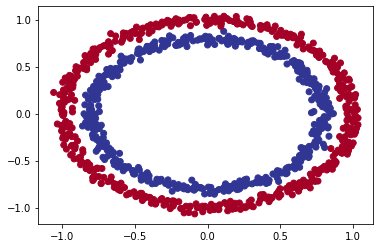

In [21]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


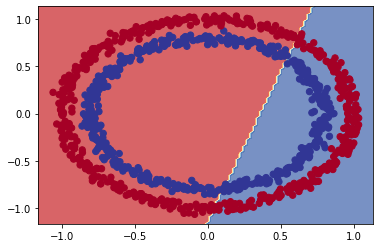

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

Let's try to build our first neural network with a non-linear activation function.

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 386us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 322us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 322us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 354us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 322us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 322us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 322us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 354us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 322us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 354us/step - loss: 3.7419 - accura

In [24]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_f = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_f.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_f.fit(X, y, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 0s 386us/step - loss: 0.6914 - accuracy: 0.5000
Epoch 2/1000
32/32 [==============================] - 0s 322us/step - loss: 0.6853 - accuracy: 0.5090
Epoch 3/1000
32/32 [==============================] - 0s 322us/step - loss: 0.6818 - accuracy: 0.5460
Epoch 4/1000
32/32 [==============================] - 0s 386us/step - loss: 0.6798 - accuracy: 0.5670
Epoch 5/1000
32/32 [==============================] - 0s 354us/step - loss: 0.6781 - accuracy: 0.5690
Epoch 6/1000
32/32 [==============================] - 0s 354us/step - loss: 0.6765 - accuracy: 0.5710
Epoch 7/1000
32/32 [==============================] - 0s 354us/step - loss: 0.6748 - accuracy: 0.6070
Epoch 8/1000
32/32 [==============================] - 0s 354us/step - loss: 0.6731 - accuracy: 0.6050
Epoch 9/1000
32/32 [==============================] - 0s 322us/step - loss: 0.6713 - accuracy: 0.6030
Epoch 10/1000
32/32 [==============================] - 0s 322us/step - loss: 0.669

In [25]:
# Evaluate the model
model_f.evaluate(X, y)

32/32 [==============================] - 0s 318us/step - loss: 3.2082e-04 - accuracy: 1.0000


[0.0003208165289834142, 1.0]

doing binary classification


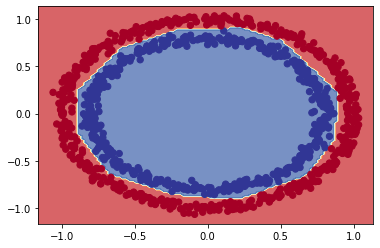

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_f, X=X, y=y)

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [27]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

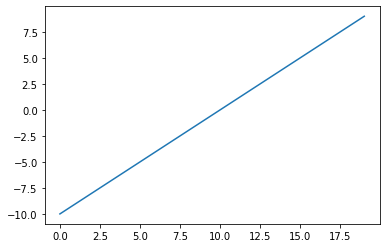

In [28]:
# Visualize our toy tensor
plt.plot(A)

In [29]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

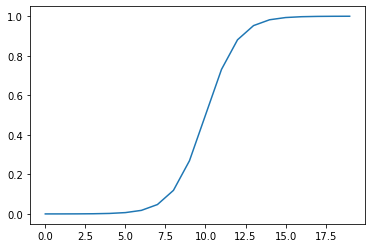

In [30]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [31]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

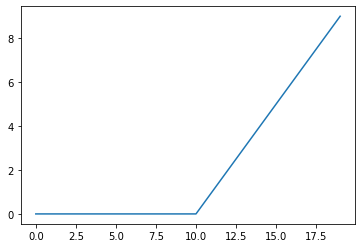

In [32]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

In [33]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

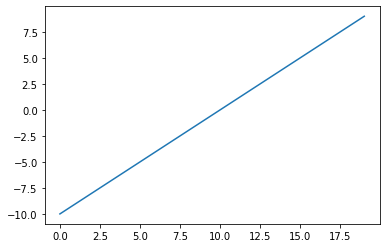

In [34]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.


In [35]:
# Split into a train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
# Let's recreate a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_f)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 332us/step - loss: 0.6817 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 332us/step - loss: 0.6667 - accuracy: 0.6363
Epoch 3/25
25/25 [==============================] - 0s 332us/step - loss: 0.6464 - accuracy: 0.6525
Epoch 4/25
25/25 [==============================] - 0s 332us/step - loss: 0.6167 - accuracy: 0.7487
Epoch 5/25
25/25 [==============================] - 0s 332us/step - loss: 0.5723 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 332us/step - loss: 0.5106 - accuracy: 0.8875
Epoch 7/25
25/25 [==============================] - 0s 332us/step - loss: 0.4410 - accuracy: 0.9463
Epoch 8/25
25/25 [==============================] - 0s 332us/step - loss: 0.3619 - accuracy: 0.9563
Epoch 9/25
25/25 [==============================] - 0s 332us/step - loss: 0.2891 - accuracy: 0.9875
Epoch 10/25
25/25 [==============================] - 0s 332us/step - loss: 0.2204 - accuracy: 0.9950

In [37]:
# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 499us/step - loss: 0.0305 - accuracy: 1.0000


[0.03051774576306343, 1.0]

doing binary classification
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

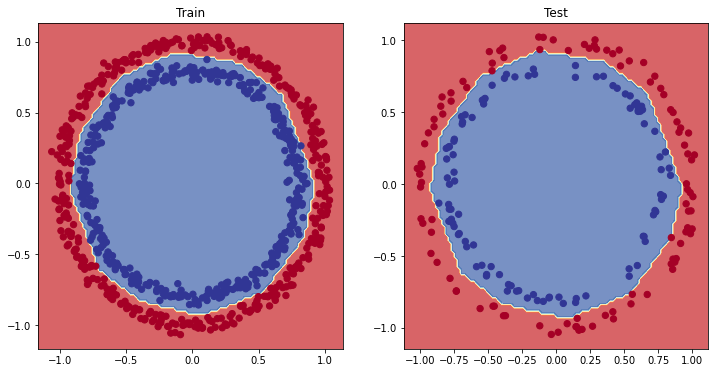

In [38]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show

## Plot the loss (or training) curves

In [39]:
# Convert the history object to a datafrae
pd.DataFrame(history.history)

,loss,accuracy
0,0.681702,0.56375
1,0.666727,0.63625
2,0.646353,0.65250
3,0.616697,0.74875
4,0.572317,0.75625
5,0.510644,0.88750
6,0.441032,0.94625
7,0.361882,0.95625
8,0.289068,0.98750
9,0.220390,0.99500


Text(0.5, 1.0, 'Model_8 loss curves')

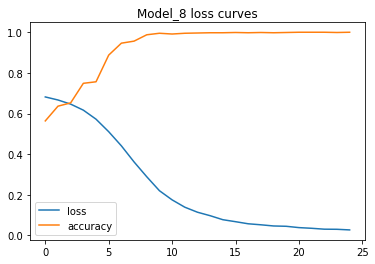

In [40]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 332us/step - loss: 0.6959 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 291us/step - loss: 0.6949 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 291us/step - loss: 0.6938 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 332us/step - loss: 0.6928 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 332us/step - loss: 0.6916 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 332us/step - loss: 0.6904 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 332us/step - loss: 0.6893 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 332us/step - loss: 0.6881 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<AxesSubplot:xlabel='epochs'>

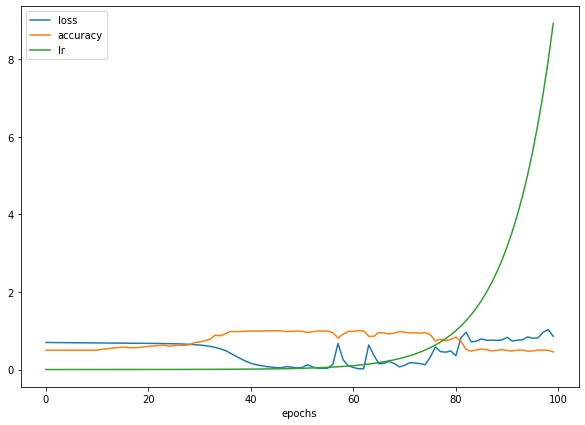

In [42]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

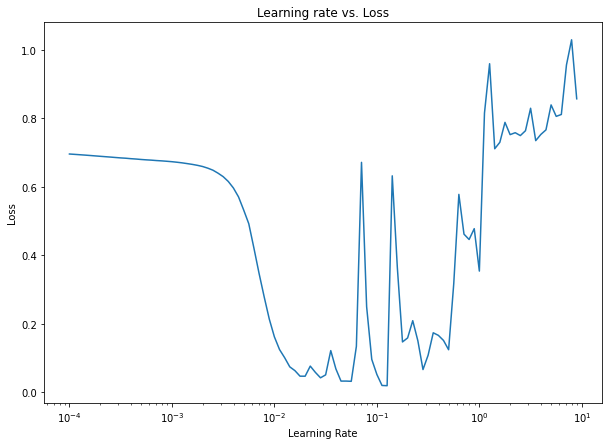

In [43]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [44]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 385us/step - loss: 0.6775 - accuracy: 0.5975
Epoch 2/20
25/25 [==============================] - 0s 332us/step - loss: 0.6498 - accuracy: 0.6500
Epoch 3/20
25/25 [==============================] - 0s 374us/step - loss: 0.5856 - accuracy: 0.7650
Epoch 4/20
25/25 [==============================] - 0s 332us/step - loss: 0.4690 - accuracy: 0.9250
Epoch 5/20
25/25 [==============================] - 0s 332us/step - loss: 0.3385 - accuracy: 0.9413
Epoch 6/20
25/25 [==============================] - 0s 291us/step - loss: 0.2155 - accuracy: 0.9800
Epoch 7/20
25/25 [==============================] - 0s 332us/step - loss: 0.1403 - accuracy: 0.9950
Epoch 8/20
25/25 [==============================] - 0s 332us/step - loss: 0.0957 - accuracy: 0.9962
Epoch 9/20
25/25 [==============================] - 0s 332us/step - loss: 0.0736 - accuracy: 0.9950
Epoch 10/20
25/25 [==============================] - 0s 332us/step - loss: 0.0573 - accuracy: 0.9950

In [45]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 332us/step - loss: 0.0279 - accuracy: 0.9950


[0.027933454141020775, 0.9950000047683716]

In [46]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 341us/step - loss: 0.0305 - accuracy: 1.0000


[0.03051774576306343, 1.0]

doing binary classification
doing binary classification


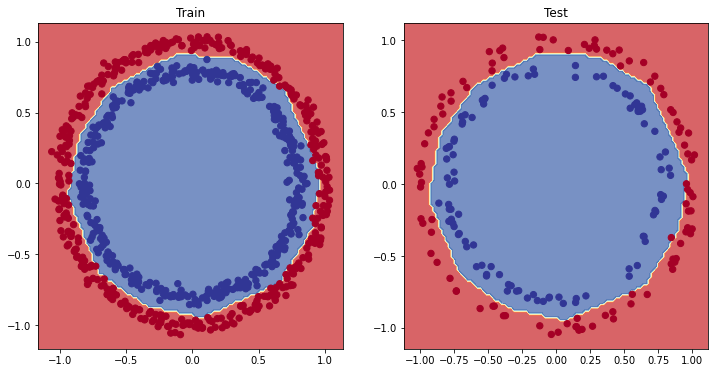

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [48]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 498us/step - loss: 0.0279 - accuracy: 0.9950
Model loss on the test set: 0.027933454141020775
Model accuracy on the test set: 99.50%


### How about a confusion matrix?

In [49]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

In [50]:
y_preds[:10], y_test[:10]

(array([[9.9971968e-01],
        [9.9996042e-01],
        [9.9990737e-01],
        [9.9957937e-01],
        [1.2740347e-01],
        [6.1863661e-04],
        [9.8225886e-01],
        [1.1467338e-03],
        [9.9978435e-01],
        [3.8885176e-03]], dtype=float32),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64))

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [51]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [52]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]], dtype=int64)

### How about we prettify our confusion matrix?

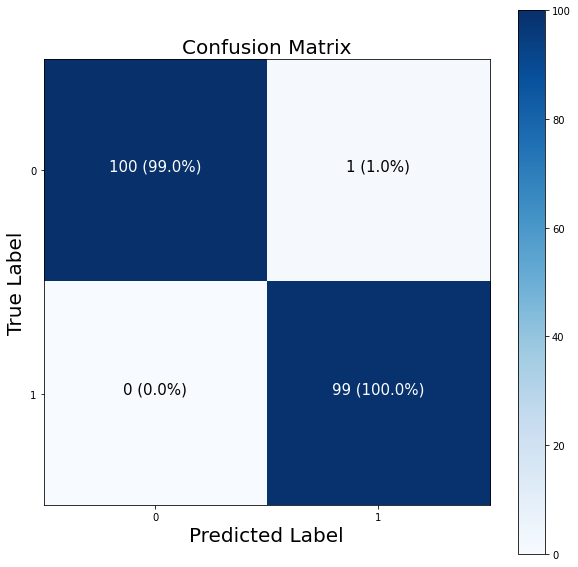

In [53]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(n_classes)

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# PLot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)


# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 diffeerent classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of differnet items of clothing.

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [55]:
# Show the first training example
print(f"Training label:\n{train_labels[0]}\n")
print(f"Training sample:\n{train_data[0]}\n")

Training label:
9

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   

In [56]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

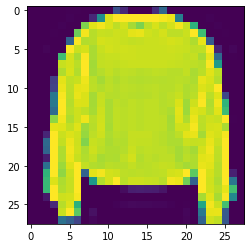

In [57]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [58]:
# Check out samples label
train_labels[7]

2

In [59]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Dress')

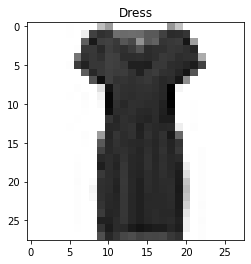

In [60]:
# Plot an example image and it's label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

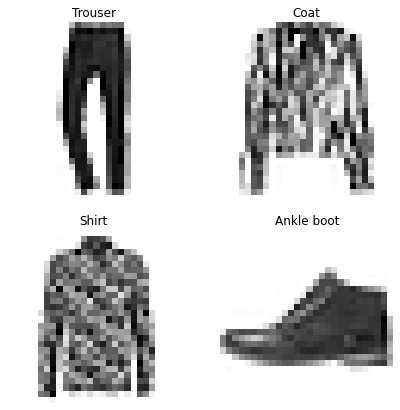

In [61]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are on-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not Sigmoid)

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create the model
# Our data needs to be flattened (from 28*28 to None, 784)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
# Use SparseCategoricalCrossentropy loss function since the input isn't one-hot encoded
# model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))
# If using CategoricalCrossentropy()
# non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 1s 437us/step - loss: 2.1514 - accuracy: 0.1651 - val_loss: 1.7827 - val_accuracy: 0.2125
Epoch 2/10
1875/1875 [==============================] - 1s 414us/step - loss: 1.6980 - accuracy: 0.2586 - val_loss: 1.6447 - val_accuracy: 0.2857
Epoch 3/10
1875/1875 [==============================] - 1s 415us/step - loss: 1.6285 - accuracy: 0.2811 - val_loss: 1.6041 - val_accuracy: 0.2889
Epoch 4/10
1875/1875 [==============================] - 1s 410us/step - loss: 1.6046 - accuracy: 0.2836 - val_loss: 1.6090 - val_accuracy: 0.2887
Epoch 5/10
1875/1875 [==============================] - 1s 412us/step - loss: 1.6020 - accuracy: 0.2868 - val_loss: 1.5802 - val_accuracy: 0.2948
Epoch 6/10
1875/1875 [==============================] - 1s 413us/step - loss: 1.5851 - accuracy: 0.2971 - val_loss: 1.5743 - val_accuracy: 0.3171
Epoch 7/10
1875/1875 [==============================] - 1s 412us/step - loss: 1.5935 - accuracy: 0.3009 - val_loss: 1.5607 -

In [63]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the test data between 0 & 1.

In [65]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [66]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 1s 421us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 387us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 390us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 389us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 385us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 397us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 389us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<AxesSubplot:title={'center':'Normalized data'}>

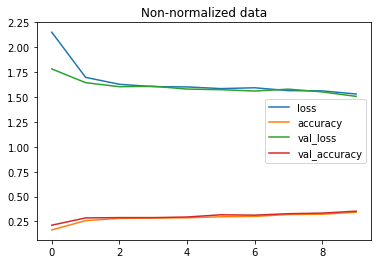

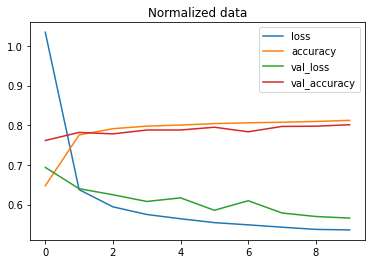

In [67]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [68]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 1s 438us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 403us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 400us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 403us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 398us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 405us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

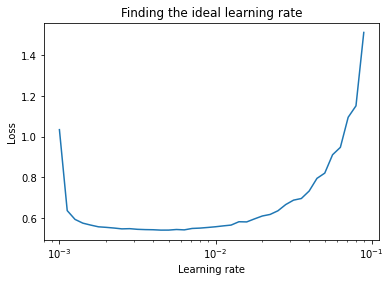

In [69]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")



In [70]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 427us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 397us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 399us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 399us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 401us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 394us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 389us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate it's performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its result (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [71]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # PLot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [72]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

array([[8.5630003e-11, 3.5361373e-13, 2.6633918e-05, 4.6356043e-08,
        5.0949729e-05, 9.6119136e-02, 8.1778374e-08, 9.1868706e-02,
        4.0605171e-03, 8.0787390e-01],
       [3.4278551e-06, 1.2899362e-16, 9.5989138e-01, 2.0516293e-07,
        1.5329252e-02, 2.4532430e-13, 2.4142893e-02, 1.1383882e-28,
        6.3272222e-04, 4.4790404e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867225e-08, 3.3405898e-03,
        1.3249549e-05, 1.4383216e-21, 8.2790930e-06, 7.3236338e-18,
        5.4811395e-08, 4.9224767e-14],
       [7.5031508e-05, 9.9053687e-01, 4.2528691e-07, 9.2231641e-03,
        1.3623195e-04, 1.8276020e-18, 2.6808320e-05, 4.8123635e-14,
        1.4521493e-06, 2.2211122e-11],
       [7.2189927e-02, 1.5495754e-06, 2.5566906e-01, 1.0363125e-02,
        4.3541349e-02, 1.1069387e-13, 6.1693019e-01, 6.7543640e-23,
        1.3049187e-03, 1.2140430e-09]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [73]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630003e-11, 3.5361373e-13, 2.6633918e-05, 4.6356043e-08,
        5.0949729e-05, 9.6119136e-02, 8.1778374e-08, 9.1868706e-02,
        4.0605171e-03, 8.0787390e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [74]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

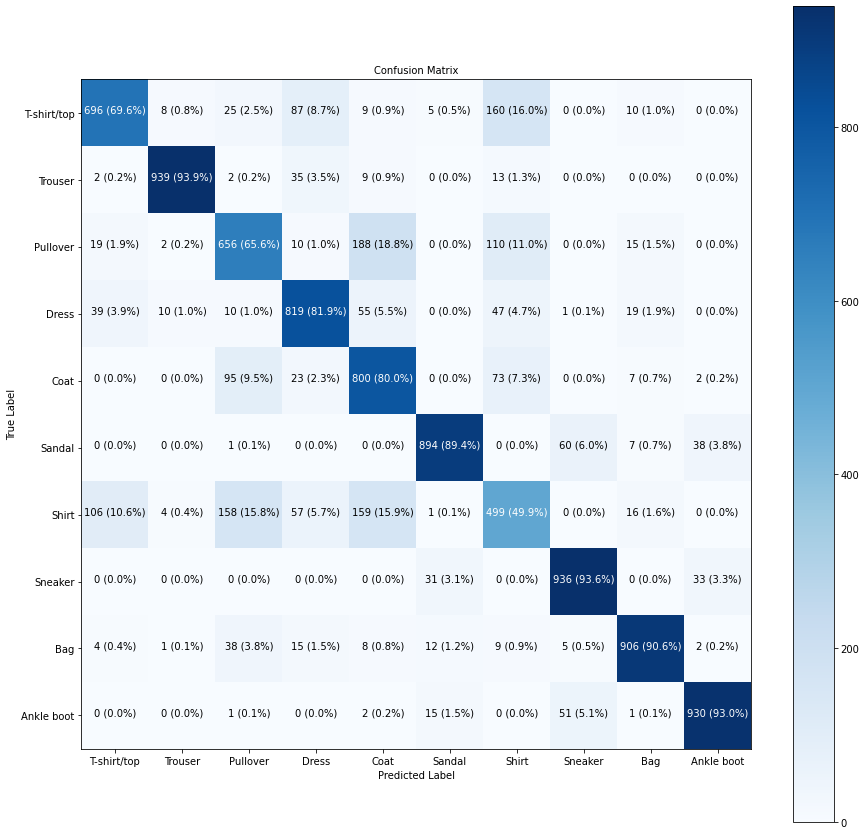

In [76]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and predicted label

In [77]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up a random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})", color=color)


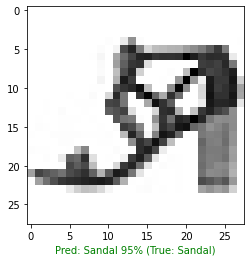

In [78]:
# Check out a random image as well as it's prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

## What patterns is our model learning?

In [79]:
# Find the layers of our most recent model
model_14.layers

In [80]:
# Extract a particular layer
model_14.layers[1]

In [81]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[ 0.71502674, -0.06077116, -0.9976308 , -1.048431  ],
        [ 0.2773213 , -0.47155383, -0.52916485,  0.02329241],
        [ 0.77524287,  0.5402758 , -1.1288567 , -0.74261534],
        ...,
        [-0.39453396,  0.47628683, -0.22641489,  0.25505948],
        [-0.4051578 ,  0.6181002 ,  0.23928444, -0.50387603],
        [ 0.23884548,  0.116069  , -0.12131386,  0.04352468]],
       dtype=float32),
 (784, 4))

In [82]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [83]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.448613e-02, -6.150390e-04, -2.723022e-01,  8.112492e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in teh case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

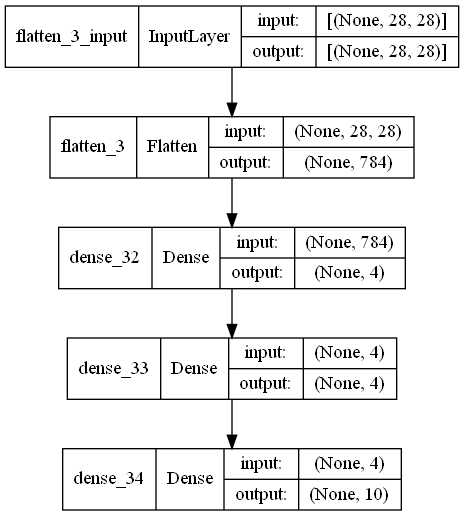

In [84]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)